In [110]:
%%writefile mqpar.xml
<?xml version="1.0" encoding="utf-8"?>
<MaxQuantParams xmlns:xsd="http://www.w3.org/2001/XMLSchema" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance">
   <fastaFiles>
      <FastaFileInfo>
         <fastaFilePath>SequencesFasta</fastaFilePath>
         <identifierParseRule>>(.*)</identifierParseRule>
         <descriptionParseRule>>(.*)</descriptionParseRule>
         <taxonomyParseRule></taxonomyParseRule>
         <variationParseRule></variationParseRule>
         <modificationParseRule></modificationParseRule>
         <taxonomyId></taxonomyId>
      </FastaFileInfo>
   </fastaFiles>
   <fastaFilesProteogenomics>
   </fastaFilesProteogenomics>
   <fastaFilesFirstSearch>
   </fastaFilesFirstSearch>
   <fixedSearchFolder></fixedSearchFolder>
   <andromedaCacheSize>350000</andromedaCacheSize>
   <advancedRatios>False</advancedRatios>
   <pvalThres>0.005</pvalThres>
   <neucodeRatioBasedQuantification>False</neucodeRatioBasedQuantification>
   <neucodeStabilizeLargeRatios>False</neucodeStabilizeLargeRatios>
   <rtShift>False</rtShift>
   <separateLfq>False</separateLfq>
   <lfqStabilizeLargeRatios>False</lfqStabilizeLargeRatios>
   <lfqRequireMsms>False</lfqRequireMsms>
   <decoyMode>revert</decoyMode>
   <boxCarMode>all</boxCarMode>
   <includeContaminants>True</includeContaminants>
   <maxPeptideMass>4600</maxPeptideMass>
   <epsilonMutationScore>True</epsilonMutationScore>
   <mutatedPeptidesSeparately>True</mutatedPeptidesSeparately>
   <proteogenomicPeptidesSeparately>True</proteogenomicPeptidesSeparately>
   <minDeltaScoreUnmodifiedPeptides>0</minDeltaScoreUnmodifiedPeptides>
   <minDeltaScoreModifiedPeptides>6</minDeltaScoreModifiedPeptides>
   <minScoreUnmodifiedPeptides>0</minScoreUnmodifiedPeptides>
   <minScoreModifiedPeptides>40</minScoreModifiedPeptides>
   <secondPeptide>True</secondPeptide>
   <matchBetweenRuns>False</matchBetweenRuns>
   <matchUnidentifiedFeatures>False</matchUnidentifiedFeatures>
   <matchBetweenRunsFdr>False</matchBetweenRunsFdr>
   <dependentPeptides>True</dependentPeptides>
   <dependentPeptideFdr>0.01</dependentPeptideFdr>
   <dependentPeptideMassBin>0.0065</dependentPeptideMassBin>
   <dependentPeptidesBetweenRuns>False</dependentPeptidesBetweenRuns>
   <dependentPeptidesWithinExperiment>False</dependentPeptidesWithinExperiment>
   <dependentPeptidesWithinParameterGroup>False</dependentPeptidesWithinParameterGroup>
   <dependentPeptidesRestrictFractions>False</dependentPeptidesRestrictFractions>
   <dependentPeptidesFractionDifference>0</dependentPeptidesFractionDifference>
   <msmsConnection>False</msmsConnection>
   <ibaq>False</ibaq>
   <top3>False</top3>
   <independentEnzymes>False</independentEnzymes>
   <useDeltaScore>False</useDeltaScore>
   <splitProteinGroupsByTaxonomy>False</splitProteinGroupsByTaxonomy>
   <taxonomyLevel>Species</taxonomyLevel>
   <avalon>False</avalon>
   <nModColumns>3</nModColumns>
   <ibaqLogFit>False</ibaqLogFit>
   <razorProteinFdr>True</razorProteinFdr>
   <deNovoSequencing>False</deNovoSequencing>
   <deNovoVarMods>True</deNovoVarMods>
   <massDifferenceSearch>False</massDifferenceSearch>
   <isotopeCalc>False</isotopeCalc>
   <writePeptidesForSpectrumFile></writePeptidesForSpectrumFile>
   <intensityPredictionsFile>
   </intensityPredictionsFile>
   <minPepLen>7</minPepLen>
   <psmFdrCrosslink>0.01</psmFdrCrosslink>
   <peptideFdr>0.01</peptideFdr>
   <proteinFdr>0.01</proteinFdr>
   <siteFdr>0.01</siteFdr>
   <minPeptideLengthForUnspecificSearch>8</minPeptideLengthForUnspecificSearch>
   <maxPeptideLengthForUnspecificSearch>25</maxPeptideLengthForUnspecificSearch>
   <useNormRatiosForOccupancy>True</useNormRatiosForOccupancy>
   <minPeptides>1</minPeptides>
   <minRazorPeptides>1</minRazorPeptides>
   <minUniquePeptides>1</minUniquePeptides>
   <useCounterparts>False</useCounterparts>
   <advancedSiteIntensities>False</advancedSiteIntensities>
   <customProteinQuantification>False</customProteinQuantification>
   <customProteinQuantificationFile></customProteinQuantificationFile>
   <minRatioCount>1</minRatioCount>
   <restrictProteinQuantification>False</restrictProteinQuantification>
   <restrictMods>
   </restrictMods>
   <matchingTimeWindow>0</matchingTimeWindow>
   <matchingIonMobilityWindow>0</matchingIonMobilityWindow>
   <alignmentTimeWindow>0</alignmentTimeWindow>
   <alignmentIonMobilityWindow>0</alignmentIonMobilityWindow>
   <numberOfCandidatesMultiplexedMsms>25</numberOfCandidatesMultiplexedMsms>
   <numberOfCandidatesMsms>15</numberOfCandidatesMsms>
   <compositionPrediction>0</compositionPrediction>
   <quantMode>2</quantMode>
   <massDifferenceMods>
   </massDifferenceMods>
   <mainSearchMaxCombinations>200</mainSearchMaxCombinations>
   <writeMsScansTable>False</writeMsScansTable>
   <writeMsmsScansTable>True</writeMsmsScansTable>
   <writePasefMsmsScansTable>True</writePasefMsmsScansTable>
   <writeAccumulatedPasefMsmsScansTable>True</writeAccumulatedPasefMsmsScansTable>
   <writeMs3ScansTable>True</writeMs3ScansTable>
   <writeAllPeptidesTable>True</writeAllPeptidesTable>
   <writeMzRangeTable>True</writeMzRangeTable>
   <writeMzTab>False</writeMzTab>
   <disableMd5>False</disableMd5>
   <cacheBinInds>True</cacheBinInds>
   <etdIncludeB>False</etdIncludeB>
   <complementaryTmtCollapseNplets>True</complementaryTmtCollapseNplets>
   <ms2PrecursorShift>0</ms2PrecursorShift>
   <complementaryIonPpm>20</complementaryIonPpm>
   <variationParseRule></variationParseRule>
   <variationMode>none</variationMode>
   <useSeriesReporters>False</useSeriesReporters>
   <name>session1</name>
   <maxQuantVersion>1.6.8.0</maxQuantVersion>
   <tempFolder></tempFolder>
   <pluginFolder></pluginFolder>
   <numThreads>1</numThreads>
   <emailAddress></emailAddress>
   <smtpHost></smtpHost>
   <emailFromAddress></emailFromAddress>
   <fixedCombinedFolder>LocalCombinedFolder</fixedCombinedFolder>
   <fullMinMz>-1.79589544172745E+308</fullMinMz>
   <fullMaxMz>1.79589544172745E+308</fullMaxMz>
   <sendEmail>False</sendEmail>
   <ionCountIntensities>False</ionCountIntensities>
   <verboseColumnHeaders>False</verboseColumnHeaders>
   <calcPeakProperties>False</calcPeakProperties>
   <showCentroidMassDifferences>False</showCentroidMassDifferences>
   <showIsotopeMassDifferences>False</showIsotopeMassDifferences>
   <useDotNetCore>False</useDotNetCore>
   <filePaths>
      <string>TestFile.raw</string>
   </filePaths>
   <experiments>
      <string></string>
   </experiments>
   <fractions>
      <short>32767</short>
   </fractions>
   <ptms>
      <boolean>False</boolean>
   </ptms>
   <paramGroupIndices>
      <int>0</int>
   </paramGroupIndices>
   <referenceChannel>
      <string></string>
   </referenceChannel>
   <intensPred>False</intensPred>
   <intensPredModelReTrain>False</intensPredModelReTrain>
   <parameterGroups>
      <parameterGroup>
         <msInstrument>0</msInstrument>
         <maxCharge>7</maxCharge>
         <minPeakLen>2</minPeakLen>
         <useMs1Centroids>False</useMs1Centroids>
         <useMs2Centroids>False</useMs2Centroids>
         <cutPeaks>True</cutPeaks>
         <gapScans>1</gapScans>
         <minTime>NaN</minTime>
         <maxTime>NaN</maxTime>
         <matchType>MatchFromAndTo</matchType>
         <intensityDetermination>0</intensityDetermination>
         <centroidMatchTol>8</centroidMatchTol>
         <centroidMatchTolInPpm>True</centroidMatchTolInPpm>
         <centroidHalfWidth>35</centroidHalfWidth>
         <centroidHalfWidthInPpm>True</centroidHalfWidthInPpm>
         <valleyFactor>1.4</valleyFactor>
         <isotopeValleyFactor>1.2</isotopeValleyFactor>
         <advancedPeakSplitting>False</advancedPeakSplitting>
         <intensityThreshold>0</intensityThreshold>
         <labelMods>
            <string></string>
            <string>Lys6</string>
         </labelMods>
         <lcmsRunType>Standard</lcmsRunType>
         <reQuantify>False</reQuantify>
         <lfqMode>0</lfqMode>
         <lfqSkipNorm>False</lfqSkipNorm>
         <lfqMinEdgesPerNode>3</lfqMinEdgesPerNode>
         <lfqAvEdgesPerNode>6</lfqAvEdgesPerNode>
         <lfqMaxFeatures>100000</lfqMaxFeatures>
         <neucodeMaxPpm>0</neucodeMaxPpm>
         <neucodeResolution>0</neucodeResolution>
         <neucodeResolutionInMda>False</neucodeResolutionInMda>
         <neucodeInSilicoLowRes>False</neucodeInSilicoLowRes>
         <fastLfq>True</fastLfq>
         <lfqRestrictFeatures>False</lfqRestrictFeatures>
         <lfqMinRatioCount>2</lfqMinRatioCount>
         <maxLabeledAa>3</maxLabeledAa>
         <maxNmods>5</maxNmods>
         <maxMissedCleavages>2</maxMissedCleavages>
         <multiplicity>2</multiplicity>
         <enzymeMode>0</enzymeMode>
         <complementaryReporterType>0</complementaryReporterType>
         <reporterNormalization>0</reporterNormalization>
         <neucodeIntensityMode>0</neucodeIntensityMode>
         <fixedModifications>
         </fixedModifications>
         <enzymes>
            <string>Trypsin/P</string>
         </enzymes>
         <enzymesFirstSearch>
         </enzymesFirstSearch>
         <enzymeModeFirstSearch>0</enzymeModeFirstSearch>
         <useEnzymeFirstSearch>False</useEnzymeFirstSearch>
         <useVariableModificationsFirstSearch>False</useVariableModificationsFirstSearch>
         <variableModifications>
         </variableModifications>
         <useMultiModification>False</useMultiModification>
         <multiModifications>
         </multiModifications>
         <isobaricLabels>
         </isobaricLabels>
         <neucodeLabels>
         </neucodeLabels>
         <variableModificationsFirstSearch>
         </variableModificationsFirstSearch>
         <hasAdditionalVariableModifications>False</hasAdditionalVariableModifications>
         <additionalVariableModifications>
         </additionalVariableModifications>
         <additionalVariableModificationProteins>
         </additionalVariableModificationProteins>
         <doMassFiltering>True</doMassFiltering>
         <firstSearchTol>20</firstSearchTol>
         <mainSearchTol>4.5</mainSearchTol>
         <searchTolInPpm>True</searchTolInPpm>
         <isotopeMatchTol>2</isotopeMatchTol>
         <isotopeMatchTolInPpm>True</isotopeMatchTolInPpm>
         <isotopeTimeCorrelation>0.6</isotopeTimeCorrelation>
         <theorIsotopeCorrelation>0.6</theorIsotopeCorrelation>
         <checkMassDeficit>True</checkMassDeficit>
         <recalibrationInPpm>True</recalibrationInPpm>
         <intensityDependentCalibration>False</intensityDependentCalibration>
         <minScoreForCalibration>70</minScoreForCalibration>
         <matchLibraryFile>False</matchLibraryFile>
         <libraryFile></libraryFile>
         <matchLibraryMassTolPpm>0</matchLibraryMassTolPpm>
         <matchLibraryTimeTolMin>0</matchLibraryTimeTolMin>
         <matchLabelTimeTolMin>0</matchLabelTimeTolMin>
         <reporterMassTolerance>NaN</reporterMassTolerance>
         <reporterPif>NaN</reporterPif>
         <filterPif>False</filterPif>
         <reporterFraction>NaN</reporterFraction>
         <reporterBasePeakRatio>NaN</reporterBasePeakRatio>
         <timsHalfWidth>0</timsHalfWidth>
         <timsStep>0</timsStep>
         <timsResolution>0</timsResolution>
         <timsMinMsmsIntensity>0</timsMinMsmsIntensity>
         <timsRemovePrecursor>True</timsRemovePrecursor>
         <timsIsobaricLabels>False</timsIsobaricLabels>
         <timsCollapseMsms>True</timsCollapseMsms>
         <crosslinkSearch>False</crosslinkSearch>
         <crossLinker></crossLinker>
         <minMatchXl>0</minMatchXl>
         <minPairedPepLenXl>6</minPairedPepLenXl>
         <crosslinkOnlyIntraProtein>False</crosslinkOnlyIntraProtein>
         <crosslinkMaxMonoUnsaturated>0</crosslinkMaxMonoUnsaturated>
         <crosslinkMaxMonoSaturated>0</crosslinkMaxMonoSaturated>
         <crosslinkMaxDiUnsaturated>0</crosslinkMaxDiUnsaturated>
         <crosslinkMaxDiSaturated>0</crosslinkMaxDiSaturated>
         <crosslinkModifications>
         </crosslinkModifications>
         <crosslinkFastaFiles>
         </crosslinkFastaFiles>
         <crosslinkSites>
         </crosslinkSites>
         <crosslinkNetworkFiles>
         </crosslinkNetworkFiles>
         <crosslinkMode></crosslinkMode>
         <peakRefinement>False</peakRefinement>
         <isobaricSumOverWindow>True</isobaricSumOverWindow>
         <isobaricWeightExponent>0.75</isobaricWeightExponent>
         <diaLibraryType>0</diaLibraryType>
         <diaLibraryPath></diaLibraryPath>
         <diaPeptidePaths>
         </diaPeptidePaths>
         <diaEvidencePaths>
         </diaEvidencePaths>
         <diaMsmsPaths>
         </diaMsmsPaths>
         <diaInitialPrecMassTolPpm>20</diaInitialPrecMassTolPpm>
         <diaInitialFragMassTolPpm>20</diaInitialFragMassTolPpm>
         <diaCorrThresholdFeatureClustering>0.85</diaCorrThresholdFeatureClustering>
         <diaPrecTolPpmFeatureClustering>2</diaPrecTolPpmFeatureClustering>
         <diaFragTolPpmFeatureClustering>2</diaFragTolPpmFeatureClustering>
         <diaScoreN>7</diaScoreN>
         <diaMinScore>2.99</diaMinScore>
      </parameterGroup>
   </parameterGroups>
   <msmsParamsArray>
      <msmsParams>
         <Name>FTMS</Name>
         <MatchTolerance>20</MatchTolerance>
         <MatchToleranceInPpm>True</MatchToleranceInPpm>
         <DeisotopeTolerance>7</DeisotopeTolerance>
         <DeisotopeToleranceInPpm>True</DeisotopeToleranceInPpm>
         <DeNovoTolerance>10</DeNovoTolerance>
         <DeNovoToleranceInPpm>True</DeNovoToleranceInPpm>
         <Deisotope>True</Deisotope>
         <Topx>12</Topx>
         <TopxInterval>100</TopxInterval>
         <HigherCharges>True</HigherCharges>
         <IncludeWater>True</IncludeWater>
         <IncludeAmmonia>True</IncludeAmmonia>
         <DependentLosses>True</DependentLosses>
         <Recalibration>False</Recalibration>
      </msmsParams>
      <msmsParams>
         <Name>ITMS</Name>
         <MatchTolerance>0.5</MatchTolerance>
         <MatchToleranceInPpm>False</MatchToleranceInPpm>
         <DeisotopeTolerance>0.15</DeisotopeTolerance>
         <DeisotopeToleranceInPpm>False</DeisotopeToleranceInPpm>
         <DeNovoTolerance>0.25</DeNovoTolerance>
         <DeNovoToleranceInPpm>False</DeNovoToleranceInPpm>
         <Deisotope>False</Deisotope>
         <Topx>8</Topx>
         <TopxInterval>100</TopxInterval>
         <HigherCharges>True</HigherCharges>
         <IncludeWater>True</IncludeWater>
         <IncludeAmmonia>True</IncludeAmmonia>
         <DependentLosses>True</DependentLosses>
         <Recalibration>False</Recalibration>
      </msmsParams>
      <msmsParams>
         <Name>TOF</Name>
         <MatchTolerance>40</MatchTolerance>
         <MatchToleranceInPpm>True</MatchToleranceInPpm>
         <DeisotopeTolerance>0.01</DeisotopeTolerance>
         <DeisotopeToleranceInPpm>False</DeisotopeToleranceInPpm>
         <DeNovoTolerance>0.02</DeNovoTolerance>
         <DeNovoToleranceInPpm>False</DeNovoToleranceInPpm>
         <Deisotope>True</Deisotope>
         <Topx>10</Topx>
         <TopxInterval>100</TopxInterval>
         <HigherCharges>True</HigherCharges>
         <IncludeWater>True</IncludeWater>
         <IncludeAmmonia>True</IncludeAmmonia>
         <DependentLosses>True</DependentLosses>
         <Recalibration>False</Recalibration>
      </msmsParams>
      <msmsParams>
         <Name>Unknown</Name>
         <MatchTolerance>20</MatchTolerance>
         <MatchToleranceInPpm>True</MatchToleranceInPpm>
         <DeisotopeTolerance>7</DeisotopeTolerance>
         <DeisotopeToleranceInPpm>True</DeisotopeToleranceInPpm>
         <DeNovoTolerance>10</DeNovoTolerance>
         <DeNovoToleranceInPpm>True</DeNovoToleranceInPpm>
         <Deisotope>True</Deisotope>
         <Topx>12</Topx>
         <TopxInterval>100</TopxInterval>
         <HigherCharges>True</HigherCharges>
         <IncludeWater>True</IncludeWater>
         <IncludeAmmonia>True</IncludeAmmonia>
         <DependentLosses>True</DependentLosses>
         <Recalibration>False</Recalibration>
      </msmsParams>
   </msmsParamsArray>
   <fragmentationParamsArray>
      <fragmentationParams>
         <Name>CID</Name>
         <Connected>False</Connected>
         <ConnectedScore0>1</ConnectedScore0>
         <ConnectedScore1>1</ConnectedScore1>
         <ConnectedScore2>1</ConnectedScore2>
         <InternalFragments>False</InternalFragments>
         <InternalFragmentWeight>1</InternalFragmentWeight>
         <InternalFragmentAas>KRH</InternalFragmentAas>
      </fragmentationParams>
      <fragmentationParams>
         <Name>HCD</Name>
         <Connected>False</Connected>
         <ConnectedScore0>1</ConnectedScore0>
         <ConnectedScore1>1</ConnectedScore1>
         <ConnectedScore2>1</ConnectedScore2>
         <InternalFragments>False</InternalFragments>
         <InternalFragmentWeight>1</InternalFragmentWeight>
         <InternalFragmentAas>KRH</InternalFragmentAas>
      </fragmentationParams>
      <fragmentationParams>
         <Name>ETD</Name>
         <Connected>False</Connected>
         <ConnectedScore0>1</ConnectedScore0>
         <ConnectedScore1>1</ConnectedScore1>
         <ConnectedScore2>1</ConnectedScore2>
         <InternalFragments>False</InternalFragments>
         <InternalFragmentWeight>1</InternalFragmentWeight>
         <InternalFragmentAas>KRH</InternalFragmentAas>
      </fragmentationParams>
      <fragmentationParams>
         <Name>PQD</Name>
         <Connected>False</Connected>
         <ConnectedScore0>1</ConnectedScore0>
         <ConnectedScore1>1</ConnectedScore1>
         <ConnectedScore2>1</ConnectedScore2>
         <InternalFragments>False</InternalFragments>
         <InternalFragmentWeight>1</InternalFragmentWeight>
         <InternalFragmentAas>KRH</InternalFragmentAas>
      </fragmentationParams>
      <fragmentationParams>
         <Name>ETHCD</Name>
         <Connected>False</Connected>
         <ConnectedScore0>1</ConnectedScore0>
         <ConnectedScore1>1</ConnectedScore1>
         <ConnectedScore2>1</ConnectedScore2>
         <InternalFragments>False</InternalFragments>
         <InternalFragmentWeight>1</InternalFragmentWeight>
         <InternalFragmentAas>KRH</InternalFragmentAas>
      </fragmentationParams>
      <fragmentationParams>
         <Name>ETCID</Name>
         <Connected>False</Connected>
         <ConnectedScore0>1</ConnectedScore0>
         <ConnectedScore1>1</ConnectedScore1>
         <ConnectedScore2>1</ConnectedScore2>
         <InternalFragments>False</InternalFragments>
         <InternalFragmentWeight>1</InternalFragmentWeight>
         <InternalFragmentAas>KRH</InternalFragmentAas>
      </fragmentationParams>
      <fragmentationParams>
         <Name>UVPD</Name>
         <Connected>False</Connected>
         <ConnectedScore0>1</ConnectedScore0>
         <ConnectedScore1>1</ConnectedScore1>
         <ConnectedScore2>1</ConnectedScore2>
         <InternalFragments>False</InternalFragments>
         <InternalFragmentWeight>1</InternalFragmentWeight>
         <InternalFragmentAas>KRH</InternalFragmentAas>
      </fragmentationParams>
      <fragmentationParams>
         <Name>Unknown</Name>
         <Connected>False</Connected>
         <ConnectedScore0>1</ConnectedScore0>
         <ConnectedScore1>1</ConnectedScore1>
         <ConnectedScore2>1</ConnectedScore2>
         <InternalFragments>False</InternalFragments>
         <InternalFragmentWeight>1</InternalFragmentWeight>
         <InternalFragmentAas>KRH</InternalFragmentAas>
      </fragmentationParams>
   </fragmentationParamsArray>
</MaxQuantParams>


Overwriting mqpar.xml


In [ ]:
%%sh
#USAGE: bash mqrun.sh
#make sure mqrun.xml is in the directory where the script is and CHANGE following paths according to the MaxQuant Installation, directory containing experiment raw files, fasta file and representative parameter file for that version respectively
MAXQUANTCMD=$HOME/MaxQuant_1.6.8.0/MaxQuant/bin/MaxQuantCmd.exe
CPU=16
DATADIR=$HOME/Animesh/Pseudomonas/
FASTAFILE=$HOME/Animesh/Pseudomonas/Pse.fasta.uniq.fasta
PARAMFILE=mqpar.xml
#leave following empty to include ALL files
PREFIXRAW=
SEARCHTEXT=TestFile.raw
SEARCHTEXT2=SequencesFasta
SEARCHTEXT3=LocalCombinedFolder
LDIR=$PWD
CURRENTEPOCTIME=`date +%s`
WRITEDIR=$PARAMFILE.$CURRENTEPOCTIME.results
mkdir $WRITEDIR
for i in $DATADIR/*raw ; do echo $i ; 	j=$(basename $i) ; 	k=${j%%.*} ; mkdir $WRITEDIR/$k ; cp $i $WRITEDIR/$k ; sed "s|$SEARCHTEXT2|$FASTAFILE|" $LDIR/$PARAMFILE > $WRITEDIR/$k/$PARAMFILE.tmp1 ; 	sed "s|$SEARCHTEXT|$LDIR/$WRITEDIR/$k/$j|"  $WRITEDIR/$k/$PARAMFILE.tmp1 > $WRITEDIR/$k/$PARAMFILE.tmp2 ; sed "s|$SEARCHTEXT3|$LDIR/$WRITEDIR/$k|"  $WRITEDIR/$k/$PARAMFILE.tmp2 > $WRITEDIR/$k/$k.xml ; rm $WRITEDIR/$k/$PARAMFILE.tmp*  ;done
#mono $MAXQUANTCMD $k.xml ; cp -rf ./combined/txt $k.REP ; echo $k ; cd $LDIR 
find $WRITEDIR -name "*.xml" | parallel -j $CPU "mono $MAXQUANTCMD {}"
#perl -pe 's/\r$//' < mqrun.sh  > tmp
#mv tmp  mqrun.sh
#mono $HOME/data/NORSTORE_OSL_DISK/NS9036K/promec/MaxQuant_1.6.8.0/MaxQuant/bin/MaxQuantCmd.exe -n $HOME/promec/Qexactive/Mirta/QExactive/Imen_Belhaj/RawData/out1678.xml
#-n for dryrun, -p <#checkpoint>
#date -d @1604251727
echo $WRITEDIR

In [5]:
%%sh
find  mqpar.xml.1606129538.results -iname "protein*txt" | xargs ls -ltrh 
#file=$HOME/data/HUNT/141018_serum_508_tech2.raw.centroidcomet-human-nextprot.txt
#head -n 4 $file

-rw-r--r-- 1 ash022 ash022  787K Nov 23 20:35 mqpar.xml.1606129538.results/140616_Pseudomonas_S1_K0K6_B2/combined/txt/proteinGroups.txt
-rw-r--r-- 1 ash022 ash022  776K Nov 23 20:39 mqpar.xml.1606129538.results/140616_Pseudomonas_S1_K0K6_B2_T2/combined/txt/proteinGroups.txt
-rw-r--r-- 1 ash022 ash022  952K Nov 23 22:30 mqpar.xml.1606129538.results/140605_Pseudomonas_O2_K0K6/combined/txt/proteinGroups.txt
-rw-r--r-- 1 ash022 ash022  1.1M Nov 23 22:41 mqpar.xml.1606129538.results/140605_Pseudomonas_S3_K0K6_T2/combined/txt/proteinGroups.txt
-rw-r--r-- 1 ash022 ash022  1.1M Nov 23 22:43 mqpar.xml.1606129538.results/140616_Pseudomonas_S2_K0K6_B2_T2/combined/txt/proteinGroups.txt
-rw-r--r-- 1 ash022 ash022 1000K Nov 23 22:44 mqpar.xml.1606129538.results/140616_Pseudomonas_O3_K0K6_B2_T2/combined/txt/proteinGroups.txt
-rw-r--r-- 1 ash022 ash022  1.1M Nov 23 22:52 mqpar.xml.1606129538.results/140616_Pseudomonas_S2_K0K6_B2/combined/txt/proteinGroups.txt
-rw-r--r-- 1 ash022 ash022  983K Nov 23 23

In [6]:
#!pip3 install pathlib --user
from pathlib import Path
pathFiles = Path(Path.home()/"notebooks/git/mqpar.xml.1606129538.results")
fileName='proteinGroups.txt'
trainList=list(pathFiles.rglob(fileName))
trainList

[PosixPath('/home/ash022/notebooks/git/mqpar.xml.1606129538.results/140605_Pseudomonas_W2_K0K6_T2/combined/txt/proteinGroups.txt'),
 PosixPath('/home/ash022/notebooks/git/mqpar.xml.1606129538.results/140605_Pseudomonas_S4_K0K6/combined/txt/proteinGroups.txt'),
 PosixPath('/home/ash022/notebooks/git/mqpar.xml.1606129538.results/140605_Pseudomonas_O3_K0K6_T2/combined/txt/proteinGroups.txt'),
 PosixPath('/home/ash022/notebooks/git/mqpar.xml.1606129538.results/140616_Pseudomonas_O3_K0K6_B2_T2/combined/txt/proteinGroups.txt'),
 PosixPath('/home/ash022/notebooks/git/mqpar.xml.1606129538.results/140605_Pseudomonas_S3_K0K6_T2/combined/txt/proteinGroups.txt'),
 PosixPath('/home/ash022/notebooks/git/mqpar.xml.1606129538.results/140616_Pseudomonas_S1_K0K6_B2/combined/txt/proteinGroups.txt'),
 PosixPath('/home/ash022/notebooks/git/mqpar.xml.1606129538.results/140616_Pseudomonas_S3_K0K6_B2_T2/combined/txt/proteinGroups.txt'),
 PosixPath('/home/ash022/notebooks/git/mqpar.xml.1606129538.results/14061

In [7]:
#!pip3 install pandas --user
import pandas as pd
df=pd.DataFrame()
for f in trainList:
    if Path(f).stat().st_size > 0:
        proteinHits=pd.read_csv(f,low_memory=False,sep='\t')
        print(f)
        proteinHits['Name']=f
        df=pd.concat([df,proteinHits],sort=False)
print(df.head())
print(df.columns)

/home/ash022/notebooks/git/mqpar.xml.1606129538.results/140605_Pseudomonas_W2_K0K6_T2/combined/txt/proteinGroups.txt
/home/ash022/notebooks/git/mqpar.xml.1606129538.results/140605_Pseudomonas_S4_K0K6/combined/txt/proteinGroups.txt
/home/ash022/notebooks/git/mqpar.xml.1606129538.results/140605_Pseudomonas_O3_K0K6_T2/combined/txt/proteinGroups.txt
/home/ash022/notebooks/git/mqpar.xml.1606129538.results/140616_Pseudomonas_O3_K0K6_B2_T2/combined/txt/proteinGroups.txt
/home/ash022/notebooks/git/mqpar.xml.1606129538.results/140605_Pseudomonas_S3_K0K6_T2/combined/txt/proteinGroups.txt
/home/ash022/notebooks/git/mqpar.xml.1606129538.results/140616_Pseudomonas_S1_K0K6_B2/combined/txt/proteinGroups.txt
/home/ash022/notebooks/git/mqpar.xml.1606129538.results/140616_Pseudomonas_S3_K0K6_B2_T2/combined/txt/proteinGroups.txt
/home/ash022/notebooks/git/mqpar.xml.1606129538.results/140616_Pseudomonas_S1_K0K6_B2_T2/combined/txt/proteinGroups.txt
/home/ash022/notebooks/git/mqpar.xml.1606129538.results/14

In [18]:
import matplotlib.pyplot as plt
import numpy as np
plt.hist(np.log2(df['Ratio H/L normalized']+0.00001))

KeyError: 'Ratio H/L normalized'

(array([ 139.,  149.,  239., 7831., 4639., 3610., 3134., 2660., 2118.,
        2234.]),
 array([0.2892679 , 1.09446408, 1.89966026, 2.70485644, 3.51005262,
        4.3152488 , 5.12044498, 5.92564116, 6.73083734, 7.53603352,
        8.3412297 ]),
 <a list of 10 Patch objects>)

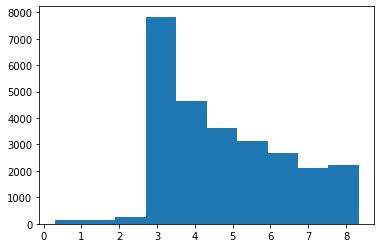

In [9]:
plt.hist(np.log2(df['Score']+1))

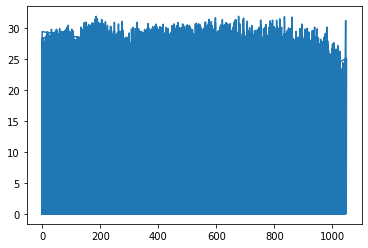

In [10]:
(np.log2(df['Intensity']+1)).plot()

In [11]:
dfP02769=df[df['Protein IDs'].str.contains('CON')]
dfP02769.head(5)

,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Fasta headers,Number of proteins,Peptides,Razor + unique peptides,Unique peptides,...,Reverse,Potential contaminant,id,Peptide IDs,Peptide is razor,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Name


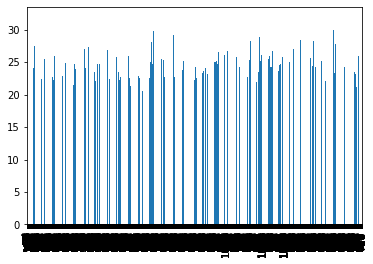

In [12]:
(np.log2(df['Intensity']+1)).plot(kind='bar',stacked=True)

In [14]:
pathFiles = Path("/home/ash022/scripts/git/mqpar.xml.1605104658.results/")
fileName='allPeptides.txt'
trainList=list(pathFiles.rglob(fileName))
import pandas as pd
import matplotlib.pyplot as plt
df=pd.DataFrame()
for f in trainList:
    peptideHits=pd.read_csv(f,low_memory=False,sep='\t')
    print(f)
    peptideHits['Name']=f
    df=pd.concat([df,peptideHits],sort=False)
print(df.head())
print(df.columns)

/home/ash022/scripts/git/mqpar.xml.1605104658.results/201105_kath_phostot_51B_20201111003132/combined/txt/allPeptides.txt
/home/ash022/scripts/git/mqpar.xml.1605104658.results/201105_kath_phostot_65B/combined/txt/allPeptides.txt
/home/ash022/scripts/git/mqpar.xml.1605104658.results/201105_kath_phostot_27B/combined/txt/allPeptides.txt
/home/ash022/scripts/git/mqpar.xml.1605104658.results/201105_kath_phostot_15B/combined/txt/allPeptides.txt
/home/ash022/scripts/git/mqpar.xml.1605104658.results/201105_kath_phostot_53B/combined/txt/allPeptides.txt
/home/ash022/scripts/git/mqpar.xml.1605104658.results/201105_kath_phostot_42B/combined/txt/allPeptides.txt
/home/ash022/scripts/git/mqpar.xml.1605104658.results/201105_kath_phostot_29B/combined/txt/allPeptides.txt
/home/ash022/scripts/git/mqpar.xml.1605104658.results/201105_kath_phostot_14B/combined/txt/allPeptides.txt
/home/ash022/scripts/git/mqpar.xml.1605104658.results/201105_kath_phostot_39B/combined/txt/allPeptides.txt
/home/ash022/scripts/g

In [102]:
#print(df.columns.get_loc("DP Proteins"))
dfDP=df.loc[:, df.columns.str.startswith('DP')|df.columns.str.startswith('Raw')]
dfDP=dfDP[dfDP['DP Proteins'].notnull()]

dfDP=dfDP.rename(columns = lambda x : str(x)[3:])
writeDPcsv=pathFiles/(fileName+"DP.csv")
print("writing output to ... ")
dfDP.to_csv(writeDPcsv)

#import pandas_profiling
#print(dfDP.profile_report())

print(writeDPcsv)
dfDPcnt=dfDP['Modification'].value_counts()
#https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/
#dfDP['Base Raw File'].value_counts().plot(kind='bar',stacked=True)
print(dfDPcnt)


writing output to ... 
/home/ash022/scripts/git/mqpar.xml.1605104658.results/allPeptides.txtDP.csv
Carbamidomethyl                6817
Phosphorylation                4174
Unmodified                     2540
Deamidation                    2215
Oxidation                      1099
                               ... 
Peptide:APIRPDIVNFVHTNLRK.N       1
Peptide:Y.LYEIAR                  1
Peptide:DNPQTHYYAVAVVKK.D         1
Peptide:K.VMDSDEDDDY              1
Peptide:L.LEVDLK                  1
Name: Modification, Length: 372, dtype: int64


In [105]:
dfDP['Modification'].value_counts()/np.sum(dfDP['Modification'].value_counts())

Carbamidomethyl                0.299490
Phosphorylation                0.183376
Unmodified                     0.111589
Deamidation                    0.097311
Oxidation                      0.048282
                                 ...   
Peptide:APIRPDIVNFVHTNLRK.N    0.000044
Peptide:Y.LYEIAR               0.000044
Peptide:DNPQTHYYAVAVVKK.D      0.000044
Peptide:K.VMDSDEDDDY           0.000044
Peptide:L.LEVDLK               0.000044
Name: Modification, Length: 372, dtype: float64

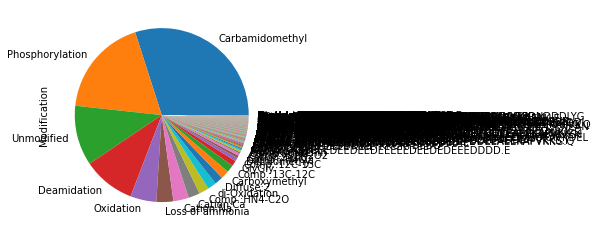

In [107]:
writeDPpng=pathFiles/(fileName+"DP.png")
if(dfDPcnt.empty==False): dfDPcnt[dfDPcnt>0].plot(kind='pie').figure.savefig(writeDPpng.absolute(),dpi=100,bbox_inches = "tight")

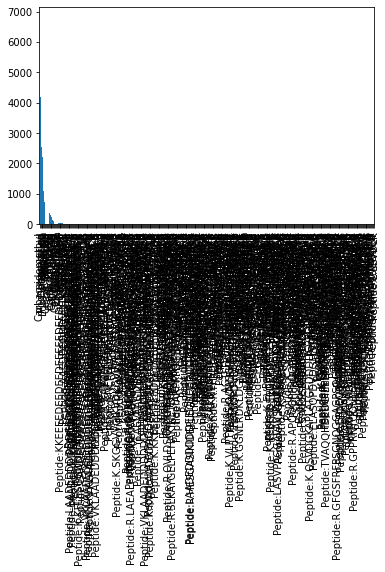

In [108]:
if(dfDPcnt.empty==False): dfDPcnt[dfDPcnt>0].plot(kind='bar',stacked=True).figure.savefig(writeDPpng.absolute(),dpi=100,bbox_inches = "tight")

In [109]:
plt.close()
print(writeDPpng)
unmodCnt=dfDP[dfDP['Modification']=='Unmodified']#unmodified count(s)
unmodCnt=unmodCnt['Base Raw File'].value_counts()
unmodCnt.index=unmodCnt.keys().str.split("_").str[-1]
dfDPcnt=dfDP['Modification'].value_counts().keys()
for i in range(10):
    modName=dfDPcnt[i]
    print(modName)
    writeDPpng=pathFiles/(fileName+"DP.png")
    dfDPmod=dfDP[dfDP['Modification']==modName]
    dfDPmod=dfDPmod['Base Raw File'].value_counts()
    dfDPmod.index=dfDPmod.keys().str.split("_").str[-1]
    print(modName,dfDPmod,(dfDPmod/unmodCnt))
    writeDPcsv=pathFiles/(fileName+modName+"DP.csv")
    dfDPmod.to_csv(writeDPcsv)
    print(writeDPcsv)
    writeDPpng=pathFiles/(fileName+modName+"DP.png")
    dfDPmod.plot(kind='pie').figure.savefig(writeDPpng.absolute(),dpi=100,bbox_inches = "tight")
    plt.close()
    print(writeDPpng)


/home/ash022/scripts/git/mqpar.xml.1605104658.results/allPeptides.txtDP.png
Carbamidomethyl
Carbamidomethyl 54B.raw               1090
2B.raw                 773
66B.raw                575
3B.raw                 489
53B.raw                414
4B.raw                 351
52B.raw                316
26B.raw                312
1B.raw                 308
15B.raw                286
17B.raw                240
20201111084632.raw     207
5B.raw                 194
40B.raw                183
30B.raw                174
28B.raw                157
29B.raw                138
42B.raw                128
16B.raw                125
65B.raw                109
27B.raw                107
39B.raw                 66
64B.raw                 46
41B.raw                 10
55B.raw                  9
14B.raw                  8
20201111003132.raw       2
Name: Base Raw File, dtype: int64 14B.raw               1.000000
15B.raw               2.200000
16B.raw               1.953125
17B.raw               1.983471
1B.ra